In [15]:
### import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl

%matplotlib inline 

dataframe = pd.ExcelFile("testetcc2.xlsx")
dataFrame = pd.read_excel(dataframe, read_excel=None)

In [16]:
df = dataFrame.dropna()

In [17]:
df

,Data,var_IGPM,var_INPC,var_IPCA,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,importacao_eletro,unidades_vendidas
0,2013-01-01,0.34,0.92,0.86,678,7.44,-4399578241,414131.800000,6.54,0,192332.7525,1923.327525,282886
1,2013-02-01,0.29,0.52,0.60,678,6.04,-1502633175,398645.400000,-1.89,0,161716.0929,1617.160929,220859
2,2013-03-01,0.21,0.60,0.47,678,6.80,-921527172,427409.800000,-2.01,0,193147.2848,1931.472848,277268
3,2013-04-01,0.15,0.59,0.55,678,7.57,-1237894348,438856.800000,9.70,0,214318.6365,2143.186365,325865
4,2013-05-01,0.00,0.35,0.37,678,7.44,451106555,439054.200000,2.44,0,219928.6328,2199.286328,308411
...,...,...,...,...,...,...,...,...,...,...,...,...,...
97,2021-02-01,2.53,0.82,0.86,1100,1.57,1822780546,673362.300000,0.25,30438,157234.2157,1572.342157,186718
98,2021-03-01,2.94,0.86,0.93,1100,2.43,6410389062,723966.100000,10.53,66573,187567.5391,1875.675391,208801
99,2021-04-01,1.51,0.38,0.31,1100,2.55,9867923319,682431.700000,34.66,82266,167266.4462,1672.664462,191853
100,2021-05-01,4.10,0.96,0.83,1100,3.29,8583950099,698842.400000,24.05,59010,179610.5421,1796.105421,206221


In [18]:
df.columns

Index(['Data', 'var_IGPM', 'var_INPC', 'var_IPCA', 'Salario_min', 'Selic_a_a',
       'Balanca_comercial_USS', 'PIB_milhoes_RS',
       'Var_producao_industrial_a_a', 'obitos_covid', 'importacao_eletro_1',
       'importacao_eletro', 'unidades_vendidas'],
      dtype='object')

In [19]:
df['Data'].head()

0   2013-01-01
1   2013-02-01
2   2013-03-01
3   2013-04-01
4   2013-05-01
Name: Data, dtype: datetime64[ns]

In [20]:
df.set_index('Data',inplace = True)

Text(0.5, 1.0, 'Óbito X Importação X Vendas')

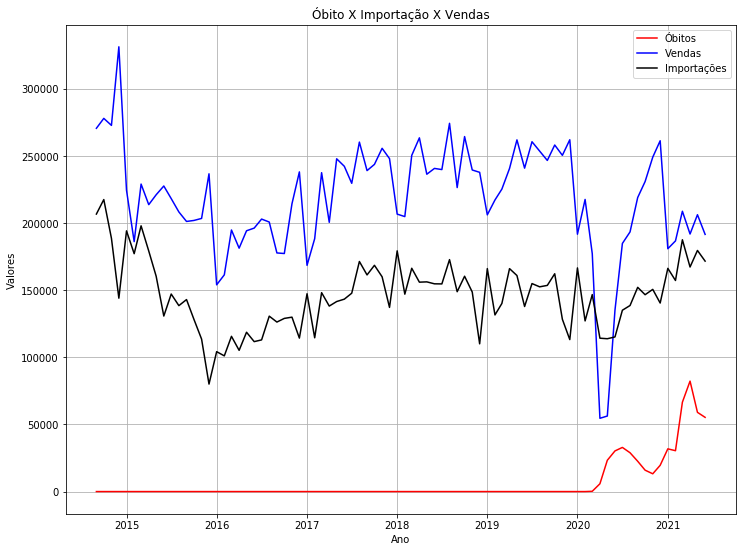

In [21]:



plt.rcParams['figure.figsize'] = (12,9)
plt.plot(df['obitos_covid'][20:400],'-',color='red',label='Óbitos')
plt.plot(df['unidades_vendidas'][20:400],'-',color='blue',label='Vendas')
plt.plot(df['importacao_eletro_1'][20:400],'-',color='black',label='Importações')
plt.grid(True)
plt.legend()

plt.xlabel('Ano')
plt.ylabel('Valores')
plt.title('Óbito X Importação X Vendas')

Text(0.5, 1.0, 'Gráfico de área impacto nas vendas')

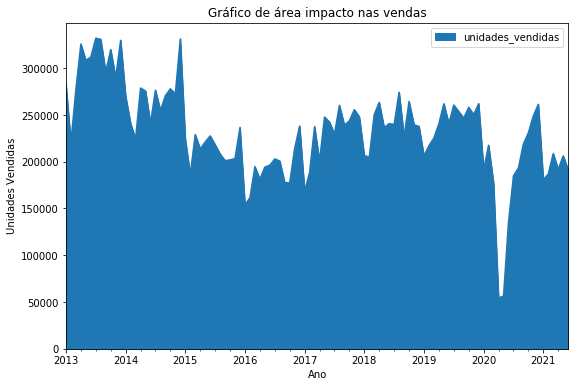

In [22]:
figura = plt.figure(figsize=(9,6))
df['unidades_vendidas'].plot(kind='area')
plt.legend()
plt.xlabel('Ano')
plt.ylabel('Unidades Vendidas')
plt.title('Gráfico de área impacto nas vendas')

In [23]:
df.corr()

,var_IGPM,var_INPC,var_IPCA,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,importacao_eletro,unidades_vendidas
var_IGPM,1.000000,0.455806,0.421408,0.357847,-0.420488,0.194606,0.444779,0.172060,0.540317,-0.046606,-0.046606,-0.192207
var_INPC,0.455806,1.000000,0.969187,-0.153421,0.114401,-0.201609,-0.065813,-0.001766,0.120008,0.012296,0.012296,0.018487
var_IPCA,0.421408,0.969187,1.000000,-0.206634,0.148423,-0.237624,-0.098158,0.025225,0.078425,0.028546,0.028546,0.094047
Salario_min,0.357847,-0.153421,-0.206634,1.000000,-0.615674,0.677027,0.924238,0.224877,0.504795,-0.502576,-0.502576,-0.534534
Selic_a_a,-0.420488,0.114401,0.148423,-0.615674,1.000000,-0.264954,-0.645679,-0.380516,-0.527831,-0.087545,-0.087545,0.070421
Balanca_comercial_USS,0.194606,-0.201609,-0.237624,0.677027,-0.264954,1.000000,0.624297,0.200065,0.477766,-0.563762,-0.563762,-0.416524
PIB_milhoes_RS,0.444779,-0.065813,-0.098158,0.924238,-0.645679,0.624297,1.000000,0.366046,0.599469,-0.364595,-0.364595,-0.299810
Var_producao_industrial_a_a,0.172060,-0.001766,0.025225,0.224877,-0.380516,0.200065,0.366046,1.000000,0.522942,0.368075,0.368075,0.369753
obitos_covid,0.540317,0.120008,0.078425,0.504795,-0.527831,0.477766,0.599469,0.522942,1.000000,0.008013,0.008013,-0.300849
importacao_eletro_1,-0.046606,0.012296,0.028546,-0.502576,-0.087545,-0.563762,-0.364595,0.368075,0.008013,1.000000,1.000000,0.616421


Text(0.5, 1.0, 'Registros com Covid')

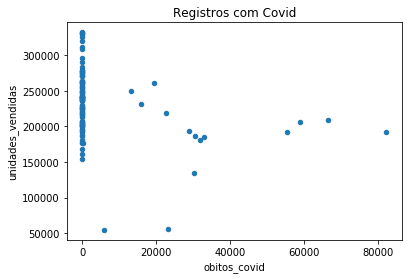

In [14]:

df.plot(x='obitos_covid',y = 'unidades_vendidas',kind='scatter')  
plt.title('Registros com Covid')

In [24]:
df.describe()

,var_IGPM,var_INPC,var_IPCA,Salario_min,Selic_a_a,Balanca_comercial_USS,PIB_milhoes_RS,Var_producao_industrial_a_a,obitos_covid,importacao_eletro_1,importacao_eletro,unidades_vendidas
count,102.000000,102.000000,102.000000,102.000000,102.000000,1.020000e+02,102.000000,102.000000,102.000000,102.000000,102.000000,102.000000
mean,0.739216,0.467549,0.463529,888.647059,8.570098,2.548571e+09,544044.564052,-1.097941,5079.078431,157895.419112,1578.954191,231506.549020
std,0.990861,0.401397,0.361300,132.102769,3.992893,2.994889e+09,72081.309984,7.863797,14683.708864,33852.274071,338.522741,48407.015845
min,-1.100000,-0.300000,-0.380000,678.000000,1.570000,-4.496455e+09,398645.400000,-27.610000,0.000000,80056.556700,800.565567,54580.000000
25%,0.200000,0.180000,0.240000,788.000000,5.942500,3.231693e+08,487356.725000,-5.165000,0.000000,135599.588375,1355.995884,202212.250000
50%,0.555000,0.390000,0.420000,937.000000,7.960000,2.621230e+09,538995.000000,-1.630000,0.000000,154712.157500,1547.121575,236545.000000
75%,0.980000,0.692500,0.685000,998.000000,12.010000,4.418438e+09,593674.175000,2.425000,0.000000,178708.122900,1787.081229,260517.000000
max,4.340000,1.510000,1.350000,1100.000000,15.660000,1.025090e+10,723966.100000,34.660000,82266.000000,244759.184300,2447.591843,332087.000000


Text(0.5, 1.0, 'Boxplot das vendas')

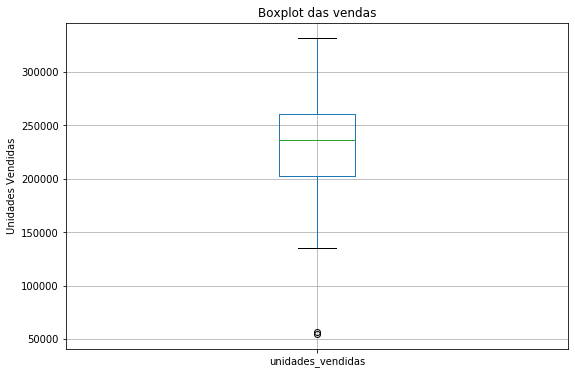

In [15]:
## informações em torno da mediana
figura = plt.figure(figsize=(9,6))
df.boxplot('unidades_vendidas',return_type ='axes')
plt.ylabel('Unidades Vendidas')
plt.title('Boxplot das vendas')


Text(0.5, 1.0, 'Histograma')

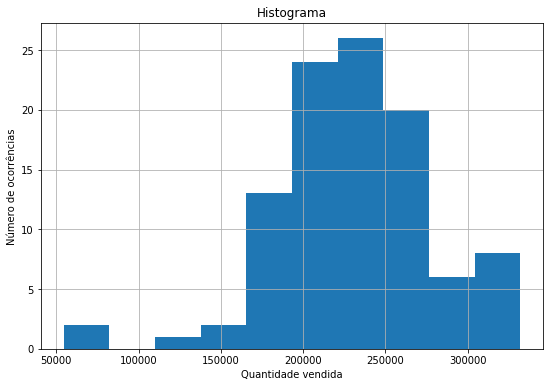

In [16]:
df.hist(('unidades_vendidas'),figsize=(9,6))
plt.xlabel('Quantidade vendida')
plt.ylabel('Número de ocorrências')
plt.title('Histograma')

In [18]:
df.columns

Index(['var_IGPM', 'var_INPC', 'var_IPCA', 'Salario_min', 'Selic_a_a',
       'Balanca_comercial_USS', 'PIB_milhoes_RS',
       'Var_producao_industrial_a_a', 'obitos_covid', 'importacao_eletro_1',
       'importacao_eletro', 'unidades_vendidas'],
      dtype='object')

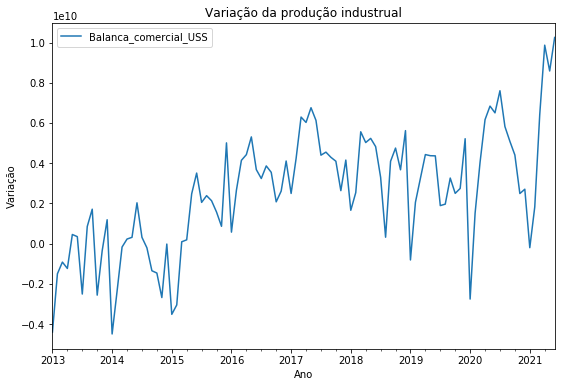

In [29]:
figura = plt.figure(figsize=(9,6))
df['Balanca_comercial_USS'].plot()
plt.ylabel('Variação')
plt.xlabel('Ano')
plt.ylabel('Variação')
plt.title('Baçança Comercial')
plt.legend()

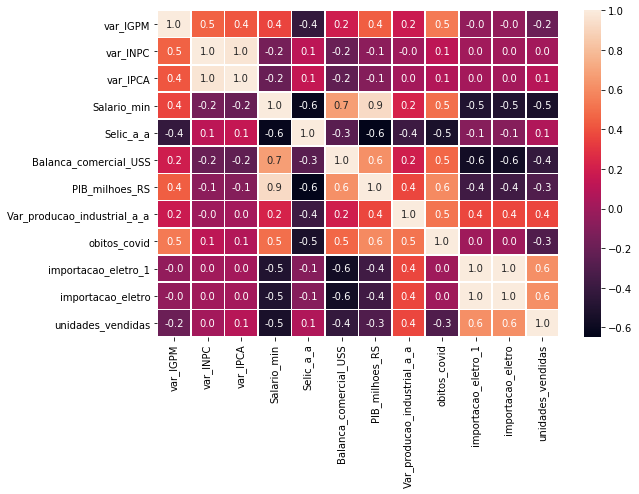

In [31]:
import seaborn as sn
correlation = df.corr()
figura = plt.figure(figsize=(9,6))
plot = sn.heatmap(correlation, annot = True, fmt=".1f", linewidths=.6)
plot